In [4]:
import pandas as pd
from datetime import datetime

In [29]:
df = pd.read_csv('img_metadata.csv', dtype={"id": str}) 

In [30]:
df["date"] = pd.to_datetime(df['captured_at'], unit='ms')

<Axes: >

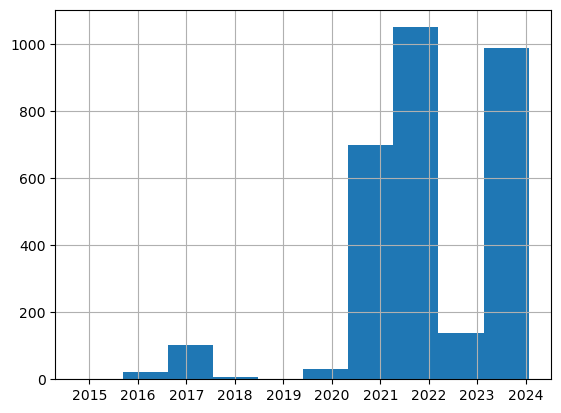

In [31]:
df.date.hist()

In [32]:
# compute distance between sequence points

In [33]:
model_prediction = pd.read_csv("test_sample-aggregation_sample-20240305_173146.csv", dtype={"Image": str}) 

# the prediction holds a value for each surface and a class probability. Only keep the highest prob.
idx = model_prediction.groupby("Image")["Prediction"].idxmax()
model_prediction = model_prediction.loc[idx]   

df = (df
  .set_index("id")
  .join(model_prediction.set_index("Image")[["Prediction", "Level_0"]], how="left")
)
df.to_csv("img_metadata_with_label.csv")

In [ ]:
# decide on sequences to download
# take samples of different sequences and decide on date and blurriness which ones to use